### Exploring Evictions in San Francisco ###

In [1]:
###Load in the necessary packages###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# utils.py
from tools import utils as ul

In [2]:
###Read in data csv file and choose which columns we want to be included###
evict = pd.read_csv("data/Eviction_Notices.csv", engine='python', on_bad_lines='skip')
bad_reasons = evict[['Eviction ID', 'Address','File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 
                     'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 
                     'Failure to Sign Renewal', 'Neighborhoods - Analysis Boundaries']].dropna()

sample = bad_reasons.sample(5000).rename({'Neighborhoods - Analysis Boundaries': 'Neighborhoods'}, axis=1)

sample['File Date'] = pd.to_datetime(sample['File Date'])
sample['year'] = pd.DatetimeIndex(sample['File Date']).year
sample['month'] = pd.DatetimeIndex(sample['File Date']).month

sample.head()

,Eviction ID,Address,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal,Neighborhoods,year,month
36414,E981567,3900 Block Of Noriega Street,1998-07-10,False,False,False,False,False,False,False,False,Sunset/Parkside,1998,7
58294,M183443,300 Block Of Serrano Drive,2018-12-24,False,False,False,False,False,False,False,False,Lakeshore,2018,12
29495,M042000,400 Block Of Sanchez Street,2004-11-02,False,False,False,False,False,True,False,False,Castro/Upper Market,2004,11
146057,M140307,700 Block Of Vermont Street,2014-02-13,False,False,True,False,False,False,False,False,Potrero Hill,2014,2
140490,M142778,1400 Block Of 25th Avenue,2014-12-29,False,False,False,False,False,False,False,False,Sunset/Parkside,2014,12


In [3]:
type(sample) == pd.core.frame.DataFrame

True

NoneType

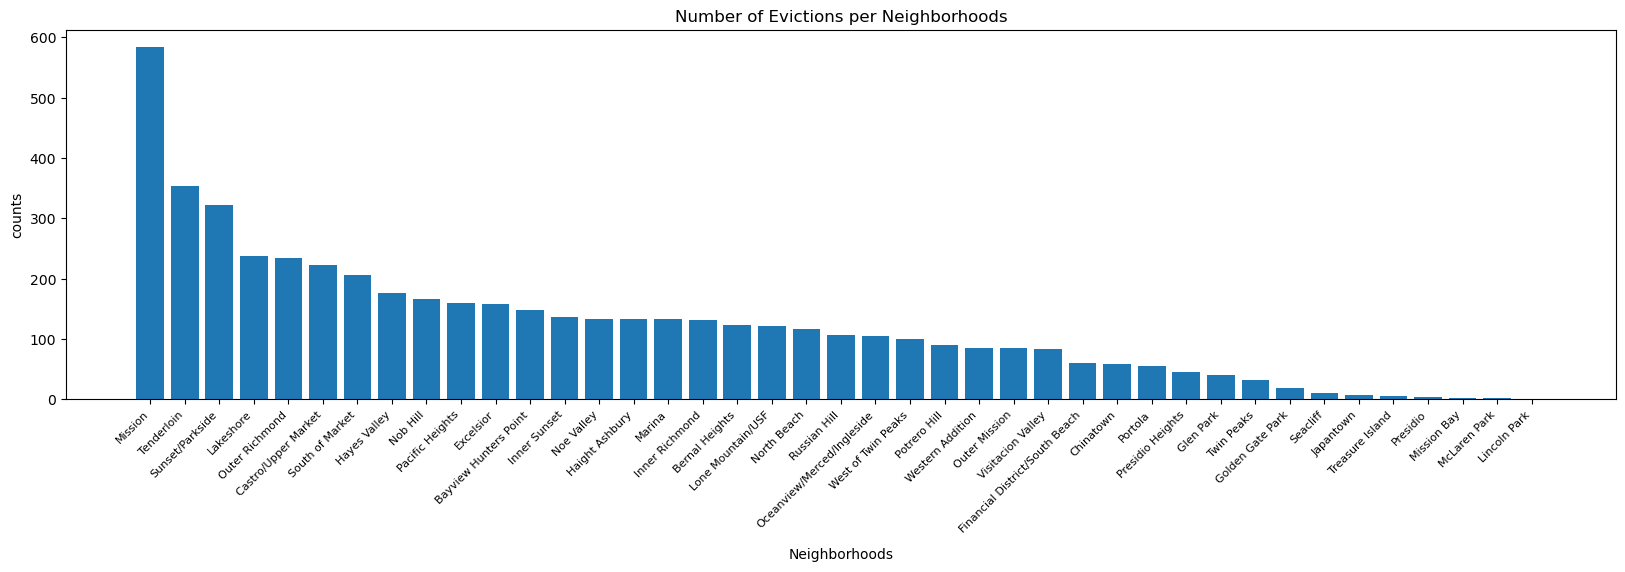

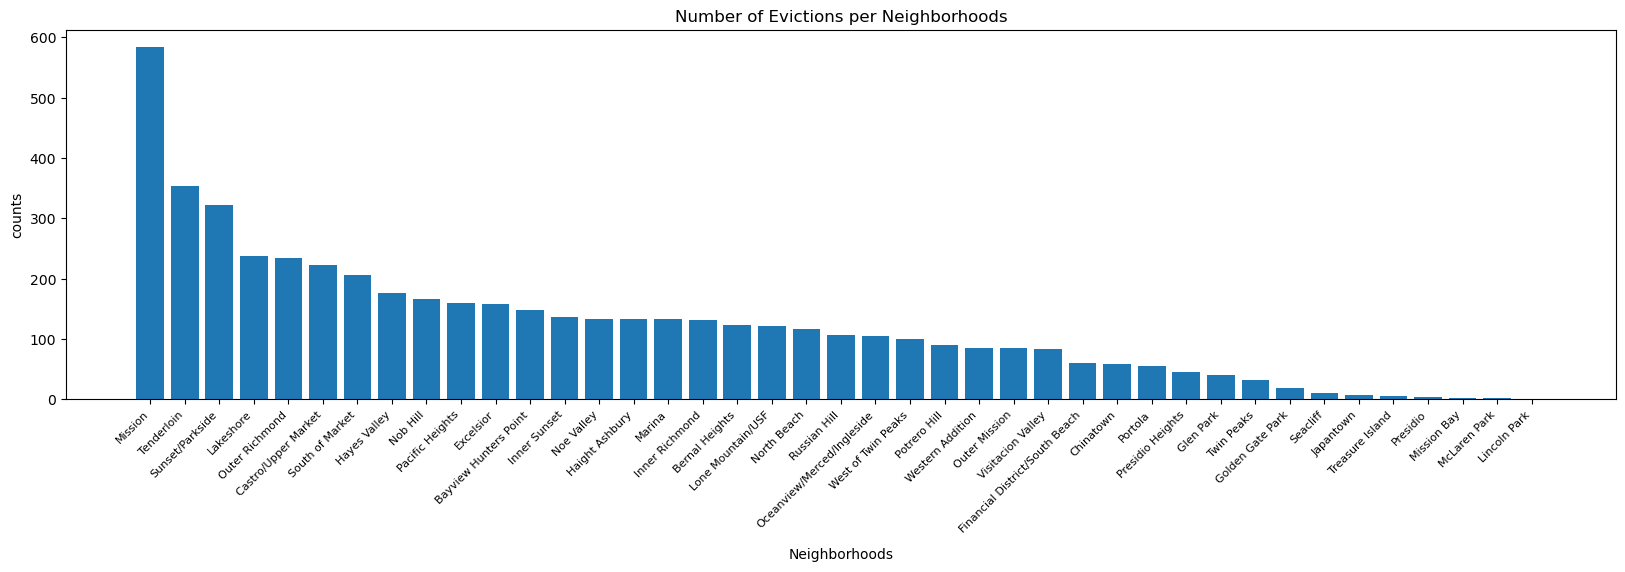

In [4]:
def get_count_plot(df, feature):
    """
    This function aims to get the total counts of evictions for each category in a certain feature, and 
    display the result in the form of a barplot.
    """
    # first get the data frame for the value counts
    counts_df = df[[feature]].value_counts().reset_index(name='counts')
    
    # specify the values for x-axis and y-axis
    x = list(counts_df[feature])
    y = list(counts_df['counts'])
    
    # plot the barplot
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
    plt.xlabel(feature, labelpad = 10)
    plt.ylabel('counts')
    plt.title("Number of Evictions per " + feature)
    plt.bar(x, y)

ul.get_count_plot(sample, 'Neighborhoods')
type(ul.get_count_plot(sample, 'Neighborhoods'))

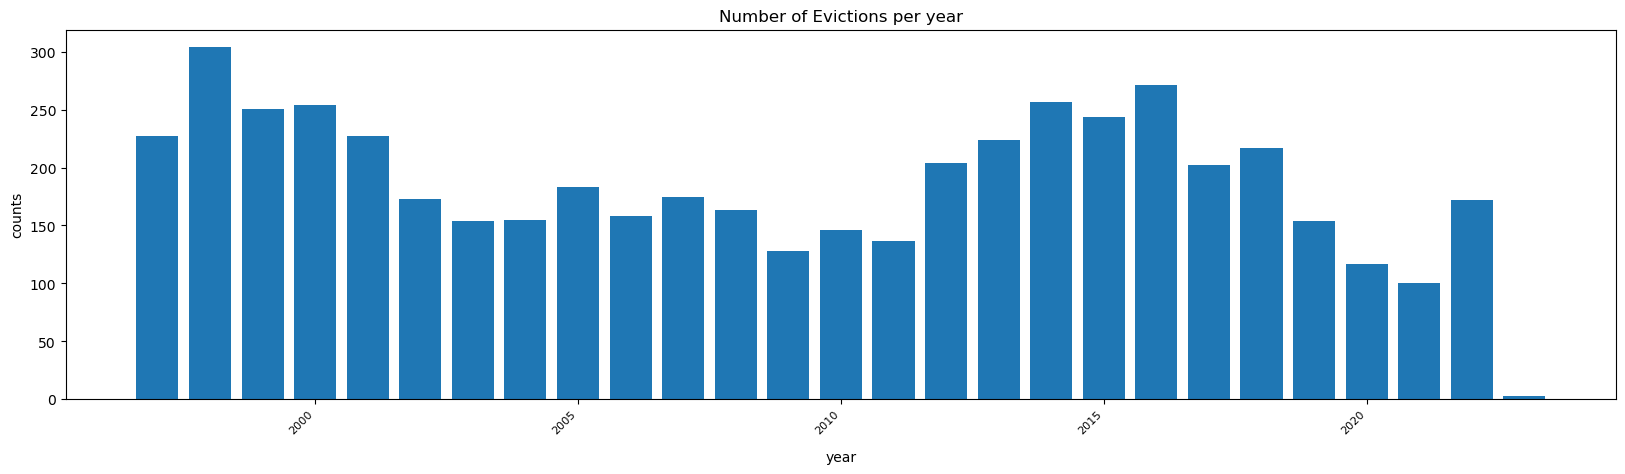

In [5]:
ul.get_count_plot(sample, 'year')

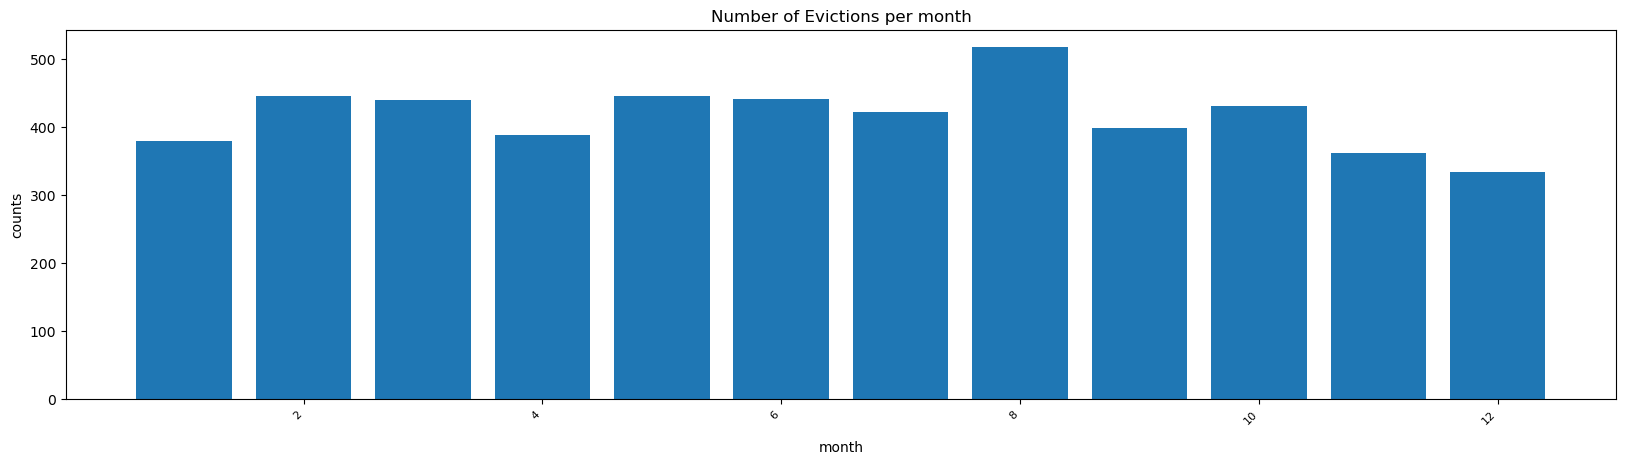

In [6]:
ul.get_count_plot(sample, 'month')

In [7]:
###load dataframe with only the reasons###
reasons = sample.iloc[:, 3:11]
reasons

,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
36414,False,False,False,False,False,False,False,False
58294,False,False,False,False,False,False,False,False
29495,False,False,False,False,False,True,False,False
146057,False,False,True,False,False,False,False,False
140490,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
137203,True,False,False,False,False,False,False,False
20157,False,False,False,False,False,False,True,False
79422,True,False,False,False,False,False,False,False
131760,False,False,False,False,False,False,False,False


In [8]:
###finding number of occurrences per reasons###
reasons = sample.iloc[:, 3:11]
for col in reasons.columns:
    print(sample[[col]].value_counts().reset_index(name='counts'))

   Non Payment  counts
0        False    4644
1         True     356
   Nuisance  counts
0     False    4078
1      True     922
   Illegal Use  counts
0        False    4892
1         True     108
   Unapproved Subtenant  counts
0                 False    4904
1                  True      96
   Demolition  counts
0       False    4855
1        True     145
   Ellis Act WithDrawal  counts
0                 False    4518
1                  True     482
   Late Payments  counts
0          False    4809
1           True     191
   Failure to Sign Renewal  counts
0                    False    4989
1                     True      11


{'Non Payment': 356, 'Nuisance': 922, 'Illegal Use': 108, 'Unapproved Subtenant': 96, 'Demolition': 145, 'Ellis Act WithDrawal': 482, 'Late Payments': 191, 'Failure to Sign Renewal': 11}


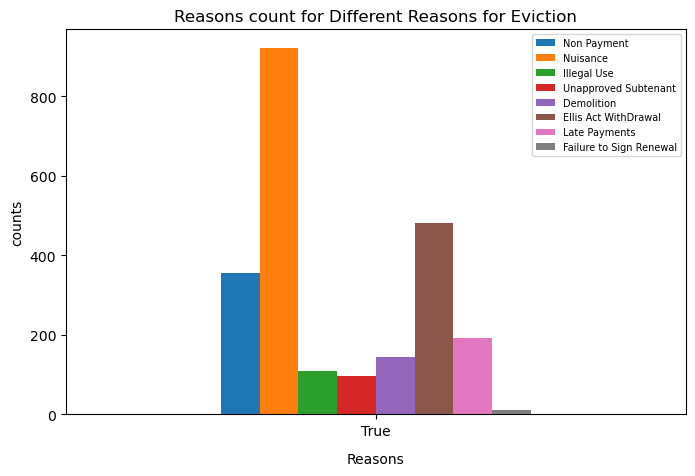

In [9]:
def reason_for_evict(self, df, names):
    """
    This function aims to get the total number of the reasons for eviction for each different reason,
    and display the result in the form of a barplot.
    The arugument 'names' is a list of the names for certain eviction reasons that you want to look into.
    """
    
    self.names = names
    reasons = df[names]
    
    # create an empty dictionary for the reasons that has TRUE input for future counts
    trues_oc = {}

    # get the total number of TRUE observations for each reason of eviction and print it 
    for i in reasons.columns:
        trues_oc[i] = reasons[i].sum()
    print(trues_oc)

    # make it into a dataframe for plotting purpose
    argh = pd.DataFrame(trues_oc, ['True'], columnNames).reset_index()
    #print(argh)

    # print the result
    reasons_list = [column for column in argh.columns]
    #print(reasons_list)
    reasons_bar = argh.plot(figsize=(8,5), x='index', y=reasons_list[1:], kind='bar', rot=0)
    plt.xlabel('Reasons', labelpad = 10)
    plt.ylabel('counts')
    plt.title("Reasons count for Different Reasons for Eviction")
    plt.legend(loc='best', fontsize='7')


names = ['Non Payment', 'Nuisance', 'Illegal Use', 
                     'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 
                     'Failure to Sign Renewal']

ul.reason_for_evict(sample, names)